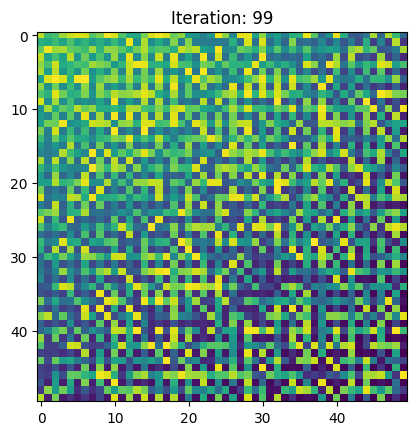

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Size of the grid
size = 50

# Initialize the grid with random fitness values between 0 and 1
grid = np.random.rand(size, size)

fig, ax = plt.subplots()

def update(num):
    ax.clear()
    ax.imshow(grid, cmap='viridis')
    ax.set_title(f"Iteration: {num}")

    # Find the index of the particle with minimum fitness
    min_index = np.unravel_index(np.argmin(grid, axis=None), grid.shape)
    
    # Mutate the particle and its neighbors
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = min_index[0] + dx, min_index[1] + dy
        if 0 <= nx < size and 0 <= ny < size:
            grid[nx, ny] = np.random.rand()
    
    # Rank the particles by fitness
    rank = np.argsort(grid, axis=None)
    
    # Iterate over each particle
    for index in np.ndindex(grid.shape):
        # Check Moore neighborhood for particles and marks
        neighborhood = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            nx, ny = index[0] + dx, index[1] + dy
            if 0 <= nx < size and 0 <= ny < size:
                neighborhood.append((nx, ny))
        
        # If there are no marks in the neighborhood, move to a free cell (if any)
        if not any(grid[nx, ny] < grid[index] for nx, ny in neighborhood):
            target = random.choice(neighborhood)
            grid[index], grid[target] = grid[target], grid[index]
        else:
            # If there are marks in the neighborhood, move to the site of the nearest mark
            # which is better than its own fitness
            better_sites = [(nx, ny) for nx, ny in neighborhood if grid[nx, ny] < grid[index]]
            if better_sites:
                target = min(better_sites, key=lambda x: grid[x])
                grid[index], grid[target] = grid[target], grid[index]

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, repeat=False)

# Save the animation as a GIF
ani.save('2DMigration.gif', writer='pillow', fps=10)
plt.show()